# K-Nearest Neighbors Assignment 
Author:  Wendy Akinyi

The goal of this assignment is to become more familiar and comfortable with K-Nearest Neighbors estimators.

First, similiar to the discussion in the live session, a KNN estimator will be constructed from scratch using first principles.

This KNN estimator will be tuned to identify the optimal value of $k$, and then compared to outcome from a SciKit Learn KNN Regressor.

The results of the KNN Regressors will be compared to the results of a more sophisticated method.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## Scenario
A very simple data set was provided that includes the number of miles and the number of deliveries made by a driver, and the time required to complete these deliveries.

Given this limited amount of information, we have been asked to predict the time required for a driver to complete a delivery run.  With the data set provided, a k-Nearest Neighbors estimator could serve as a good starting model for this exercise.

### Part 1
Data acquistion and inspection
- Load delivery_time_train_data.csv, delivery_time_test_data.csv into Pandas DataFrames named delivery_train, delivery_test respectively
- Calculate the number of null values per feature
- Examine the first five rows of delivery_train
    - The data set is small, but will offer good practice

In [30]:
# Load the data sets
delivery_train = pd.read_csv('delivery_time_train_data.csv')
delivery_test = pd.read_csv('delivery_time_test_data.csv')

# Calculate the number of null values per feature
print("\nNumber of null values per feature in the train dataset.")
print(delivery_train.isnull().sum())
print("\nNumber of null values per feature in the test dataset.")
print(delivery_test.isnull().sum())

# Examine the first five rows of delivery_train
print(delivery_train.head(5))


Number of null values per feature in the train dataset.
Miles         0
Deliveries    0
Time          0
dtype: int64

Number of null values per feature in the test dataset.
Miles         0
Deliveries    0
Time          0
dtype: int64
   Miles  Deliveries  Time
0    100           4   9.3
1     50           3   4.8
2    100           4   8.9
3    100           2   6.5
4     50           2   4.2


### Part 2
Construct the Training and Testing Input and Target Sets
- The input features are $Miles$ and $Deliveries$, and the target is the $Time$ attribute
- From delivery_train, construct X_train with only the input features, and y_train with only the target feature
- From delivery_test, construct X_test with only the input features, and y_test with only the target feature
- Show the dimensions of X_train, y_train, X_test, and y_test

In [31]:
# Construct the Training and Testing Sets
# Training Data
X_train = delivery_train.drop(columns='Time')
y_train = delivery_train['Time']

#Testing Data
X_test = delivery_test.drop(columns='Time')
y_test = delivery_test['Time']

# Dimensions of the data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (199, 2)
y_train shape: (199,)
X_test shape: (101, 2)
y_test shape: (101,)


### Part 3
Build a brute force KNN Regressor from scratch
- The $Miles$ and $Deliveries$ features from the Training Data will be used as input to predict $Time$.
- Construct a function ($calculate\_knn\_regression$) that predicts the target value for each instance in the Test data.
    - The function should utilize four input parameters
        - Input Data for proximity measurements
        - A corresponding set of Input Target values for prediction calculations
        - An External Data set of features in which to predict an outcome from the $k$ nearest neighbors in the Input Data
        - A $k$ input variable for number of nearest neighbors to consider in the predictions with a default value of five.
    - Tip: Please review the notes and code from the live session discussion on this matter
- Call $calculate\_knn\_regression$  with $k$ equal to the default setting, X_train and y_train as the necessary Training Data, and X_test as the External Data
    - Save the results to a variable y_test_scratch_pred. 

In [32]:
def calculate_knn_regression(input_data, input_targets, external_data, k=5):
    """
    Implements K-Nearest Neighbors regression from scratch.
    
    Parameters:
    -----------
    input_data : numpy.ndarray
        Training feature data used for proximity measurements
    input_targets : numpy.ndarray
        Training target values corresponding to input_data
    external_data : numpy.ndarray
        Test feature data for which predictions are needed
    k : int, default=5
        Number of nearest neighbors to consider for prediction
        
    Returns:
    --------
    numpy.ndarray
        Predicted values for external_data
    """
    # Convert inputs to numpy arrays if they aren't already
    input_data = np.array(input_data)
    input_targets = np.array(input_targets)
    external_data = np.array(external_data)

    # Initialize array to store predictions of the external data
    predictions = np.zeros(len(external_data))

    # Calculate predictions for each point in external_data
    for i, test_point in enumerate(external_data):
        # Calculate Euclidean distances to all training points
        distances = np.sqrt(np.sum((input_data - test_point)**2, axis=1))

        # Find indices of k nearest neighbors
        nearest_indices = np.argsort(distances)[:k]

        # Get target values of k nearest neighbors
        nearest_targets = input_targets[nearest_indices]

        # Calculate prediction as mean of nearest neighbor targets
        predictions[i] = np.mean(nearest_targets)

    return predictions


# Make predictions
y_test_scratch_pred = calculate_knn_regression(
        input_data=X_train,
        input_targets=y_train,
        external_data=X_test,
        k=5  # Using default value
    )

    # Print predictions
print( y_test_scratch_pred)

   

[ 5.14  6.5   6.64  6.2   9.16  9.22  7.26  8.22  6.78  6.64  9.22  8.44
  6.78  6.56  7.36  8.44  5.98  9.52  6.48  7.54  5.14  9.22  8.22  9.02
  5.98  4.74  9.16  6.34  5.04  6.5   6.52  6.48 10.76  9.76  8.78  8.08
  5.3   7.36  8.78  5.5   5.04  9.68  7.5   7.5   8.22  5.1   9.62  5.1
  5.98  6.5   9.16  6.76  8.22  9.04  8.08  8.42  7.54  6.48  8.08  5.98
  7.5   8.78  7.36  8.16  9.62  9.04  8.6   9.16  9.22  5.14  8.38  5.3
  6.06  5.3  10.76  9.22  5.48  4.72  8.22  7.3   4.4   4.4   8.4   6.64
  9.76  6.4   6.66  6.4   6.6   6.06  7.36  6.48  6.2   8.08  9.16  9.22
  5.98  4.22  7.36  8.38  7.54]


### Part 4
Evaluation of the brute force method
- Calculate the RMSE between the actual test target values and the predicted test target values (y_test_scratch_pred) from Part 3
- Calculate the RMSE between the actual training target values and the predicted values using X_train as the External Data
    - Call the calculate_knn_regressor function with data_to_predict = X_train to acquire training predictions
    - Save the training set predictions to a variable named y_train_scratch_pred
- In a Markdown cell, explain if the brute force regressor is overfitting.  

In [33]:
# Calculate RMSE for test predictions
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_scratch_pred))
print(f"Test RMSE: {rmse_test}")

Test RMSE: 1.0477377799075227


In [34]:
# Predict training set target values
y_train_scratch_pred = calculate_knn_regression(
    input_data=X_train,
    input_targets=y_train,
    external_data=X_train,
    k=5  # Using default value
)

# Calculate RMSE for training predictions
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_scratch_pred))
print(f"Training RMSE: {rmse_train}")


Training RMSE: 0.7674050773638517


The model is overfitting since the training RMSE is much lower than the testing RMSE an indication that the model performs much better on the training data than the test data.


### Part 5
Tune the hyperparameter $k$ of the brute force KNN regression algorithm. 
- Specify a range of values from $k=1$ to $k=50$ 
- Within a for-loop, call the $calculate\_knn\_regression$ with incrementing values of $k$ and gather the predictions for the Training and Testing Data
- Calculate and gather the RMSE values for both the Training and Test set predictions into an array for later inspection
    - The array should consist of [$k$, RMSE on Training Data at $k$, RMSE on Testing Data at $k$] 
    - np.empty() and np.vstack() are helpful here
- From the array of scores, identify and print the optimum value of $k$ from the Testing RMSE, and the corresponding RMSE scores from the testing and training data sets
    - Did the tuning identify $k=5$ as the optimum value? No, the value identified is 3
- Plot the Training and Test RMSE scores versus $k$ values

Optimal k: 3.0
Training RMSE at optimal k: 0.7001156481001438
Testing RMSE at optimal k: 1.0112513351913521


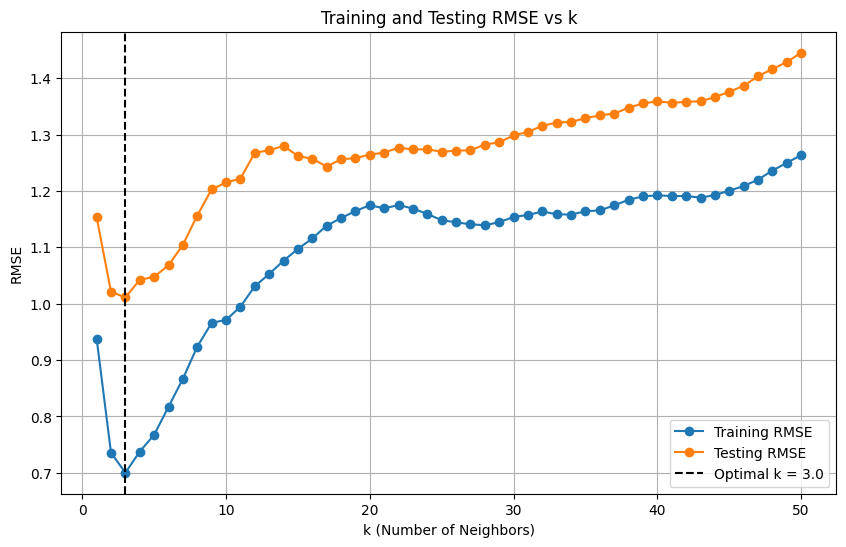

In [35]:
# Define the range of k values
k_values = range(1, 51)

# Initialize an empty array to store results
results = np.empty((0, 3))  # Columns: [k, RMSE_train, RMSE_test]

# Iterate through each k value
for k in k_values:
    # Predict for training data
    y_train_pred = calculate_knn_regression(
        X_train.values, y_train.values, X_train.values, k=k)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predict for testing data
    y_test_pred = calculate_knn_regression(
        X_train.values, y_train.values, X_test.values, k=k)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append results to the array
    results = np.vstack((results, [k, rmse_train, rmse_test]))

# Identify the optimal k value
optimal_k_index = np.argmin(results[:, 2])  # Index of minimum test RMSE
optimal_k = results[optimal_k_index, 0]
optimal_rmse_train = results[optimal_k_index, 1]
optimal_rmse_test = results[optimal_k_index, 2]

print(f"Optimal k: {optimal_k}")
print(f"Training RMSE at optimal k: {optimal_rmse_train}")
print(f"Testing RMSE at optimal k: {optimal_rmse_test}")


# Plot the training and testing RMSE scores versus k values
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], label="Training RMSE", marker='o')
plt.plot(results[:, 0], results[:, 2], label="Testing RMSE", marker='o')
plt.axvline(x=optimal_k, c='k', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("RMSE")
plt.title("Training and Testing RMSE vs k")
plt.legend()
plt.grid(True)
plt.show()

### Part 6
Comparison to SKLearn's KNN regressor
- Using KNeighborsRegressor() from SKLearn, instantiate a KNN regressor with the n_neighbors hyperparameter set to the optimal value of $k$ found in Part 5
- Fit the instantiated KNN regressor with Training Data sets (X_train and y_train)
- From this trained sklearn KNN regressor, make predictions with the Testing Input Data
    - Save the predictions to a variable named y_test_skl_pred
- Compute the RMSE of the sklearn predictions to the actual values. 
- How does this RMSE value compare to the brute force method above in Part 5?

In [36]:
# Instantiate the KNeighborsRegressor with the optimal k value
optimal_k = int(optimal_k)  # Ensures optimal_k is an integer
skl_knn = KNeighborsRegressor(n_neighbors=optimal_k)

# Fit the model on the training data
skl_knn.fit(X_train, y_train)

# Make predictions on the test data
y_test_skl_pred = skl_knn.predict(X_test)

# Compute the RMSE for the scikit-learn predictions
rmse_skl = np.sqrt(mean_squared_error(y_test, y_test_skl_pred))
print(f"Scikit-Learn KNN Regressor RMSE: {rmse_skl}")

# Compare to the brute-force RMSE
print(f"Brute-Force KNN Regressor RMSE: {optimal_rmse_test}")

Scikit-Learn KNN Regressor RMSE: 1.0418207806786663
Brute-Force KNN Regressor RMSE: 1.0112513351913521


Both implementations are performing very similarly,however, the brute force implementation has a slightly lower RMSE than scikit-learn's implementation. 

### Part 7
Importance of scaling the data
- Show the descriptive statistics of the X_train data set
    - Notice the difference in scales between these two features
- Standardize the feature data sets by using StandardScaler() from sklearn.preprocessing and following the protocol discussed in class
    - That is, fit to the Training Data, and then transform the Training and Testing Data
    - Name these data sets X_train_scaled and X_test_scaled
- Similar to Part 5, execute a for-loop to identify the optimal value of $k$ with the scaled data sets
    - You can copy and paste the loop from Part 5
    - Update the data sets called by calculate_knn_regression to the scaled data sets
    - What value of $k$ is optimal with the scaled data?
- Instantiate a k-nearest neighbor model using KNeighborsRegressor() with the n_neighbors hyperparameter set to the optimal $k$ found in this grid search, and fit the regressor with the scaled training data sets
- Using the fitted KNeighborsRegressor, predict the outcomes from the scaled testing data set.
    - Save the predictions into a variable named y_test_scaled_skl_pred
- Calculate the RMSE score from the test target data and y_test_scaled_skl_pred
- In a Markdown cell, document the differences in the RMSE scores between the scaled predictions here and the unscaled predictions in Part 6

In [37]:
# Show descriptive statistics of X_train
print(X_train.describe().T)

            count       mean        std   min   25%   50%   75%    max
Miles       199.0  70.075377  20.153937  40.0  50.0  75.0  87.5  100.0
Deliveries  199.0   3.472362   1.601133   1.0   2.0   3.0   5.0    6.0


In [38]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Show the first 5 rows of the scaled training data
print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])

Scaled Training Data (first 5 rows):
[[ 1.48854766  0.33037168]
 [-0.99861426 -0.29576132]
 [ 1.48854766  0.33037168]
 [ 1.48854766 -0.92189431]
 [-0.99861426 -0.92189431]]


Optimal k: 13.0
Training RMSE at optimal k: 0.7880085341998221
Testing RMSE at optimal k: 0.9113625822912044


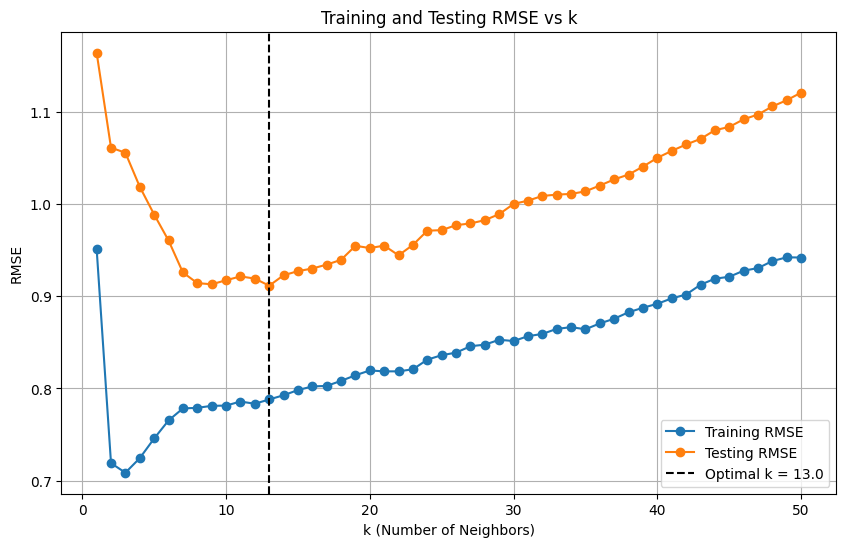

In [39]:
# Define the range of k values
k_values = range(1, 51)

# Initialize an empty array to store results
results_scaled = np.empty((0, 3))  # Columns: [k, RMSE_train, RMSE_test]

# Iterate through each k value
for k in k_values:
    # Predict for training data
    y_train_pred = calculate_knn_regression(
        X_train_scaled, y_train.values, X_train_scaled, k=k)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predict for testing data
    y_test_pred = calculate_knn_regression(
        X_train_scaled, y_train.values, X_test_scaled, k=k)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append results to the array
    results_scaled = np.vstack((results_scaled, [k, rmse_train, rmse_test]))

# Identify the optimal k value
optimal_k_scaled_index = np.argmin(results_scaled[:, 2])  # Index of minimum test RMSE
optimal_k_scaled = results_scaled[optimal_k_scaled_index, 0]
optimal_rmse_train_scaled = results_scaled[optimal_k_scaled_index, 1]
optimal_rmse_test_scaled = results_scaled[optimal_k_scaled_index, 2]

print(f"Optimal k: {optimal_k_scaled}")
print(f"Training RMSE at optimal k: {optimal_rmse_train_scaled}")
print(f"Testing RMSE at optimal k: {optimal_rmse_test_scaled}")

# Plot the training and testing RMSE scores versus k values
plt.figure(figsize=(10, 6))
plt.plot(results_scaled[:, 0], results_scaled[:, 1], label="Training RMSE", marker='o')
plt.plot(results_scaled[:, 0], results_scaled[:, 2], label="Testing RMSE", marker='o')
plt.axvline(x=optimal_k_scaled, c='k', linestyle='--',
            label=f'Optimal k = {optimal_k_scaled}')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("RMSE")
plt.title("Training and Testing RMSE vs k")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Instantiate the KNeighborsRegressor with the optimal k value
skl_knn_scaled = KNeighborsRegressor(n_neighbors=int(optimal_k_scaled))
# Fit the model on the scaled training data
skl_knn_scaled.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=13)

In [41]:
# Make predictions on the scaled testing data
y_test_scaled_skl_pred = skl_knn_scaled.predict(X_test_scaled)

In [42]:
# Compute the RMSE for the scikit-learn predictions
rmse_skl_scaled = np.sqrt(mean_squared_error(y_test, y_test_scaled_skl_pred))
print(f"Scikit-Learn KNN Regressor RMSE (scaled data): {rmse_skl_scaled}")

# Uncaled RMSE
print(f"Scikit-Learn KNN Regressor RMSE: {rmse_skl}")


Scikit-Learn KNN Regressor RMSE (scaled data): 0.9261297575641344
Scikit-Learn KNN Regressor RMSE: 1.0418207806786663


The RMSE on the scaled data is lower than the RMSE on the unscaled data. This improvement is due to the standardization of features, which ensures that all features contribute equally to the distance calculations. Therefore scaling improves model performance, leading to accurate and reliable predictions.

### Part 8
Comparison to a Random Forest Regressor
- Instantiate a RandomForestRegressor from sklearn.ensemble with default hyperparameters
    - Fix the random state for reproducibility
- Using the unscaled training data sets, train the Random Forest Regressor
- Using the unscaled testing data set, predict the outcomes from the Random Forest.
    - Save these predictions in a variable named: y_test_rf_pred 
- Calculate the RMSE of the predictions from the test set to the actual test target values

In [43]:
# Instantiate the Random Forest Regressor with default hyperparameters
rf_regressor = RandomForestRegressor(random_state=204)

In [44]:
# Fit the Random Forest Regressor on the unscaled training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=204)

In [45]:
# Predict on the unscaled testing data
y_test_rf_pred = rf_regressor.predict(X_test)

In [46]:
# Calculate the RMSE for the Random Forest predictions
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_rf_pred))
print(f"Random Forest Regressor RMSE: {rmse_rf}")

Random Forest Regressor RMSE: 0.9912217825802551


### Part 9
Model Comparison
- This assignment included predictions on the Testing Data from:
    - A tuned brute force KNN Regressor built from scratch on unscaled (Part 5) and scaled (Part 7) data
    - The tuned KNN Regressor included in sklearn on unscaled (Part 6) and scaled (Part 7) data
    - A Random Forest Regressor with no tuning on unscaled data (Part 8)
- Which of these models performed best?

In [47]:
print(f"Random Forest Regressor RMSE: {rmse_rf}")
print(f"Scikit-Learn KNN Regressor RMSE: {rmse_skl}")
print(f"Scikit-Learn KNN Regressor RMSE (scaled data): {rmse_skl_scaled}")
print(f"Brute-Force KNN Regressor RMSE : {optimal_rmse_test}")
print(f"Testing RMSE at optimal k (scaled data): {optimal_rmse_test_scaled}")

Random Forest Regressor RMSE: 0.9912217825802551
Scikit-Learn KNN Regressor RMSE: 1.0418207806786663
Scikit-Learn KNN Regressor RMSE (scaled data): 0.9261297575641344
Brute-Force KNN Regressor RMSE : 1.0112513351913521
Testing RMSE at optimal k (scaled data): 0.9113625822912044


The tuned brute-force k-NN regressor with scaled data performed the best. Scaling the data improved the models performances.
The Random Forest Regressor performed well even without scaling since they are less sensitive to feature scaling because they are based on decision trees, which split data based on feature thresholds rather than distances.